This code takes in data taken from the SQL query for sdss known as CasJobs. We are not able to get the flux and wavelength values, so we create a txt file of the fiber, plate, and mjd. This is what the first two functions do. Create a csv of just the fiber, plate, and mjd values for all ~30k quasars. Then creating a text file in the second function. Due to the way SDSS bulk downloads work they save all the fits for that have the same plate number in a folder of that plate number. To get all the fits file in one folder for easier accessibility I use the last function to copy all the folders of the fits files into another folder that no longer separates the fits by plate number.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.io import ascii
from astropy.table import Table
import numpy as np
import os
import pdb
import shutil
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
def csv_dict(filepath):
    
    # reads in the file 
    data = ascii.read(str(filepath))


    # gets the plate values 
    plate = data['plate']

    # gets the mjd values 
    mjd = data['mjd']

    # gets the fiberid values 
    fiberid = data['fiberid']
    
    #creates dictionary of the arrays of integers for plates, mjd, fiberid
    starvalue_dict = {"PLATE": plate, "MJD": mjd, "FIBER": fiberid}
    
    return starvalue_dict

def writeresultdict(resultsdict, outfileroot, txtfile_name, outfileprefix=None):
    
    mainoutfilename = outfileroot + str(txtfile_name)
    with open(mainoutfilename, 'w') as fout:
        donutsum = resultsdict
        for i in range(len(resultsdict['MJD'])):
            outstr =  '{:04d}'.format((donutsum["PLATE"][i])) + '/spec'+'-' +\
            '{:04d}'.format((donutsum["PLATE"][i]))+ '-'+\
            '{:05d}'.format(donutsum["MJD"][i]) + '-' + '{:04d}'.format(donutsum["FIBER"][i]) +  '.fits' + '\n'
            fout.write(outstr)


def copyfiles_fromfolder_tofolder(Root_dir,target_folder,extension):
    RootDir1 = str(Root_dir)
    TargetFolder = str(target_folder)
    for root, dirs, files in os.walk((os.path.normpath(RootDir1)), topdown=False):
        for name in files:
            if name.endswith(str(extension)):
                SourceFolder = os.path.join(root,name)
                shutil.copy2(SourceFolder, TargetFolder)

In [3]:
var_qso_dict = csv_dict('/Users/matt/Desktop/DESI_Research/DESI_ML/Data/var_quasar_data/final_var.csv')

writeresultdict(var_qso_dict,"/Users/matt/Desktop/DESI_Research/DESI_ML/", "final_var_qsos.txt")

# copyfiles_fromfolder_tofolder("/Users/matt/Desktop/DESI_Research/DESI_ML/data/new_var_folderrs/",\
#                               "/Users/matt/Desktop/DESI_Research/DESI_ML/data/new_var_qsos/",".fits")

In [4]:
var_qso_dict = csv_dict('/Users/matt/Desktop/DESI_Research/DESI_ML/Data/var_quasar_data/final_var_long.csv')

writeresultdict(var_qso_dict,"/Users/matt/Desktop/DESI_Research/DESI_ML/Data/var_quasar_data/final_var_folder_long/", "final_var_qsos_long.txt")

In [5]:
data = ascii.read('/Users/matt/Desktop/DESI_Research/DESI_ML/Data/var_quasar_data/final_var.csv')

In [6]:
Table(data)

Z,plate,mjd,fiberid,class,snMedian,eboss_target1,Column1,subclass,psfmag_u,psfmag_g,psfmag_r,psfmag_i,psfmag_z,ra,dec
float64,int64,int64,int64,str3,float64,int64,float64,str9,str8,str8,str8,str8,str8,float64,float64
2.455971,7582,56960,956,QSO,3.727391,1073743872,2.455971,BROADLINE,21.73138,21.18241,20.81283,20.68985,20.66145,338.08097,21.766115
2.48205,7593,56958,16,QSO,3.380299,2048,2.48205,BROADLINE,22.92721,21.44738,21.2322,21.14526,21.35209,3.74045769999998,21.074762
2.743237,7608,56945,561,QSO,2.774732,2048,2.743237,BROADLINE,22.84599,22.001,21.4893,21.32229,20.7203,344.05448,19.02449
2.72771,7613,56988,752,QSO,4.359501,2048,2.72771,BROADLINE,23.33905,21.92027,21.66672,21.75422,21.47956,344.06865,23.937163
2.669707,7658,57312,346,QSO,8.36096,2048,2.669707,BROADLINE,21.97215,20.88731,20.58795,20.4663,20.2082,344.07947,24.732968
2.543271,7662,57358,512,QSO,0.3716348,1073743872,2.543271,null,21.84261,21.09971,20.9219,20.81677,20.20554,3.73136,26.29027
2.861536,7665,57328,206,QSO,3.51046,2048,2.861536,BROADLINE,22.72581,21.54795,20.98248,20.81313,20.47795,1.34289339999998,22.534033
2.529027,7693,57361,106,QSO,3.558678,3072,2.529027,BROADLINE,21.35485,20.63287,20.60041,20.75488,20.60304,7.85307779999999,27.38921
2.972634,7693,57361,117,QSO,3.844058,2048,2.972634,BROADLINE,22.42541,20.66069,20.27909,20.4134,20.56245,7.8338799,27.783132


Text(0, 0.5, 'Frequency')

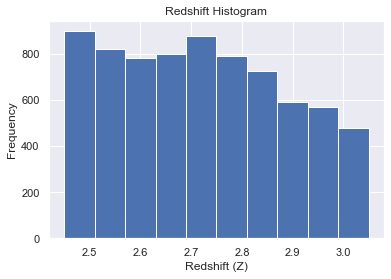

In [7]:
a,b,c = plt.hist(data["Z"])
plt.title('Redshift Histogram')
plt.xlabel('Redshift (Z)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

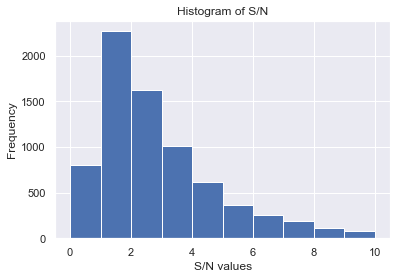

In [8]:
a,b,c = plt.hist(data['snMedian'])
plt.title('Histogram of S/N')
plt.xlabel('S/N values')
plt.ylabel('Frequency')

In [9]:
len(data['snMedian'])

7328

In [10]:
varqso_highSN = []
varqso_lowSN = []
        
for i in range(len(data['snMedian'])):
    
    if data['snMedian'][i] >= 10.1:
        varqso_highSN.append(data['snMedian'][i])
        
    else:
        varqso_lowSN.append(data['snMedian'][i])

In [11]:
print('The number of low SN variable QSOs are =', len(varqso_lowSN))

The number of low SN variable QSOs are = 7328


Text(0, 0.5, 'DEC (deg)')

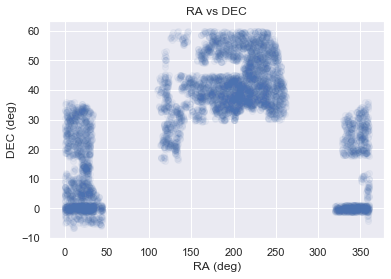

In [12]:
#plt.scatter(data['ra'],data['dec'], s = 0.1)
plt.scatter(data['ra'],data['dec'], alpha = 0.05)

plt.title('RA vs DEC')
plt.xlabel('RA (deg)')
plt.ylabel('DEC (deg)')

In [13]:
len(data['Z'])

7328

There are 6168 quasars within 2.5 and 3.0 redshift
There are 1003 quasars with less than 10 in S/N


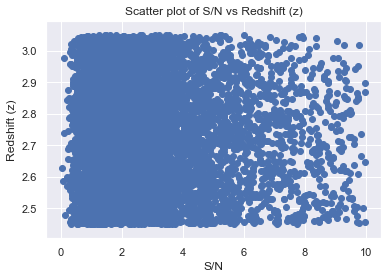

In [14]:
plt.scatter(data['snMedian'], data['Z'])
#plt.plot(np.arange(0,max(data['snMedian'])),np.ones(31)*2.5, color = 'black', linestyle = 'dashed', linewidth = 2)
#plt.plot(np.arange(0,max(data['snMedian'])),np.ones(31)*3.0, color = 'black', linestyle = 'dashed', linewidth = 2)

plt.title('Scatter plot of S/N vs Redshift (z)')
plt.ylabel('Redshift (z)')
plt.xlabel('S/N')

truez = []
truesn = []

for i in range(len(data["Z"])):
    truez.append(((data['Z'][i] > 2.5) & (data['Z'][i] < 3.0)))
    truesn.append((data['snMedian'][i] < 10.0) & (data['snMedian'][i] > 5.0))
print('There are', +len(data['Z'][truez]) ,'quasars within 2.5 and 3.0 redshift')
print('There are', +len(data['snMedian'][truesn]), 'quasars with less than 10 in S/N')

In [15]:
# plt.scatter(data['psfmag_r'],data['Z'])
# plt.title('R_mag vs. Redshift (z)')
# plt.xlabel('R_mag')
# plt.ylabel('Redshift (z)')

In [16]:
qso_dict = csv_dict('/Users/matt/Desktop/DESI_Research/DESI_ML/Data/high_SN_quasar/high_SN_QSO.csv')

writeresultdict(qso_dict,"/Users/matt/Desktop/DESI_Research/DESI_ML/", "high_SN_qsos.txt")
